In [18]:
import pandas as pd
import datetime as dt
from config import pword
from sqlalchemy import create_engine 

In [7]:
csv = "Resources/sunspot_data.csv"
sunce = pd.read_csv(csv)
sunce.head()

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,0,1818,1,1,1818.001,-1,-1.0,0,1
1,1,1818,1,2,1818.004,-1,-1.0,0,1
2,2,1818,1,3,1818.007,-1,-1.0,0,1
3,3,1818,1,4,1818.010,-1,-1.0,0,1
4,4,1818,1,5,1818.012,-1,-1.0,0,1


<AxesSubplot:xlabel='Date In Fraction Of Year', ylabel='Number of Sunspots'>

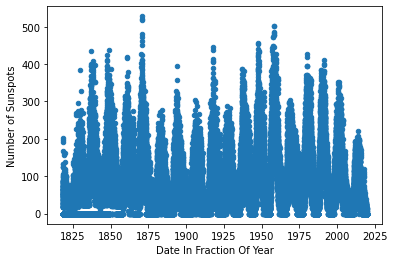

In [8]:
sunce.plot.scatter("Date In Fraction Of Year", "Number of Sunspots")

In [9]:
sunce.dtypes

Unnamed: 0                    int64
Year                          int64
Month                         int64
Day                           int64
Date In Fraction Of Year    float64
Number of Sunspots            int64
Standard Deviation          float64
Observations                  int64
Indicator                     int64
dtype: object

In [10]:
#f string the date consolidation
#frame[‘DataFrame Column’]= frame[‘DataFrame Column’].apply(str)
sundata = sunce[['Number of Sunspots', 'Observations']]
dates= sunce[['Month', 'Day', 'Year']]
#sundata['Date'] = sunce['Month'].str.cat(df['Day'],sep="-")
dates['Month'] = dates['Month'].apply(str)
dates['Day'] = dates['Day'].apply(str)
dates['Year'] = dates['Year'].apply(str)
dates.dtypes

<ipython-input-10-b63060387890>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['Month'] = dates['Month'].apply(str)
<ipython-input-10-b63060387890>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['Day'] = dates['Day'].apply(str)
<ipython-input-10-b63060387890>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

Month    object
Day      object
Year     object
dtype: object

In [11]:
dates['Date'] = dates['Month'].str.cat(dates['Day'],sep="-")
sundata['Dates'] = dates['Date'].str.cat(dates['Year'],sep="-")
sundata

<ipython-input-11-2a3fb2481b42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['Date'] = dates['Month'].str.cat(dates['Day'],sep="-")
<ipython-input-11-2a3fb2481b42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sundata['Dates'] = dates['Date'].str.cat(dates['Year'],sep="-")


,Number of Sunspots,Observations,Dates
0,-1,0,1-1-1818
1,-1,0,1-2-1818
2,-1,0,1-3-1818
3,-1,0,1-4-1818
4,-1,0,1-5-1818
...,...,...,...
73713,0,34,10-27-2019
73714,0,34,10-28-2019
73715,0,30,10-29-2019
73716,0,24,10-30-2019


In [12]:
sunspotdata = sundata[['Dates', 'Number of Sunspots', 'Observations']]
sunspotdata = sunspotdata.rename(columns={"Dates": "date", "Number of Sunspots": "total_sunspots", "Observations":"observations"})
sunspotdata

,date,total_sunspots,observations
0,1-1-1818,-1,0
1,1-2-1818,-1,0
2,1-3-1818,-1,0
3,1-4-1818,-1,0
4,1-5-1818,-1,0
...,...,...,...
73713,10-27-2019,0,34
73714,10-28-2019,0,34
73715,10-29-2019,0,30
73716,10-30-2019,0,24


In [13]:
datum = sunce[["Year","Month", "Day"]]
datum = pd.to_datetime(datum)
datum

0       1818-01-01
1       1818-01-02
2       1818-01-03
3       1818-01-04
4       1818-01-05
           ...    
73713   2019-10-27
73714   2019-10-28
73715   2019-10-29
73716   2019-10-30
73717   2019-10-31
Length: 73718, dtype: datetime64[ns]

In [14]:
sunspotdata['Datetime'] = datum
sunspotdata

,date,total_sunspots,observations,Datetime
0,1-1-1818,-1,0,1818-01-01
1,1-2-1818,-1,0,1818-01-02
2,1-3-1818,-1,0,1818-01-03
3,1-4-1818,-1,0,1818-01-04
4,1-5-1818,-1,0,1818-01-05
...,...,...,...,...
73713,10-27-2019,0,34,2019-10-27
73714,10-28-2019,0,34,2019-10-28
73715,10-29-2019,0,30,2019-10-29
73716,10-30-2019,0,24,2019-10-30


In [15]:
sunspotdata = sunspotdata.drop(columns=['date'])
sunspotdata = sunspotdata[['Datetime', 'total_sunspots', 'observations']]


In [16]:
sunspotdata = sunspotdata.rename(columns={"Datetime": "date"})
sunspotdata

,date,total_sunspots,observations
0,1818-01-01,-1,0
1,1818-01-02,-1,0
2,1818-01-03,-1,0
3,1818-01-04,-1,0
4,1818-01-05,-1,0
...,...,...,...
73713,2019-10-27,0,34
73714,2019-10-28,0,34
73715,2019-10-29,0,30
73716,2019-10-30,0,24


In [19]:
rds_connection_string = f"postgres:{pword}@localhost:5432/ETL_project"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [20]:
engine.table_names()

<ipython-input-20-d72bc75a6b62>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['sunspots', 'gas_prices', 'bitcoin', 'tesla_stock']

In [21]:
sunspotdata.to_sql(name='sunspots', con=engine, if_exists='append', index=False)